# Preparing the Dataset

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [3]:
# Kept the original dataset
listingsNYC = pd.read_csv('listings.csv', dtype=object)

In [4]:
# Dropping all of the columns which we will not use
# listingsNYC= listingsNYC.drop(['last_review','license','latitude','longitude','host_name'], axis=1)

# Dropping all rows with any 'Nan' values in them
# listingsNYC.dropna(axis=0, how='any', inplace=True)
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64'}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)

# creating a price per stay (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['pps'] = (listingsNYC['price'] * listingsNYC['minimum_nights']).round(2)
listingsNYC_outlier=listingsNYC.copy(deep=True)
listingsNYC

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,pps
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN,5775
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.8038,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN,150
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN,1800
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN,136
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN,5250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.84727072881559,-73.94341916084775,Private room,80,5,0,NaN,NaN,3,358,0,NaN,400
41529,771967712456918474,Sunset Park Studio Sublet,326495,Laura Adriana,Brooklyn,Sunset Park,40.63832893587064,-74.01671019409663,Entire home/apt,42,30,0,NaN,NaN,3,89,0,NaN,1260
41530,771971759808918693,9B5B Townhouse w/ Elevator & Private Entrance,316920152,Allison,Manhattan,Murray Hill,40.74690169639175,-73.97826030246593,Entire home/apt,3888,2,0,NaN,NaN,8,365,0,NaN,7776
41531,771971822371481471,Huge 9B5B Townhouse w Elevator & Private Entr...,484979380,Natasha,Manhattan,Murray Hill,40.74959584319043,-73.98079769535242,Entire home/apt,3888,2,0,NaN,NaN,2,364,0,NaN,7776


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

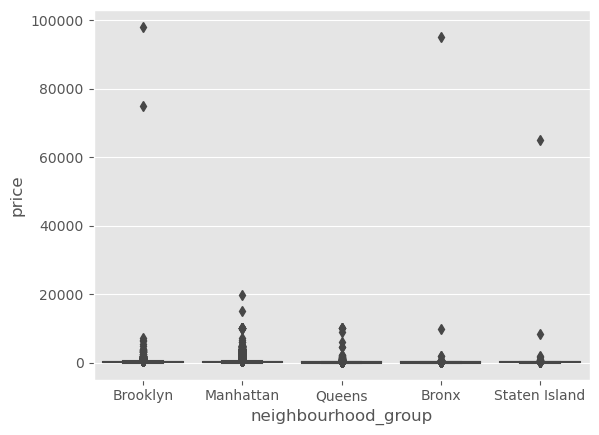

In [5]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = listingsNYC)

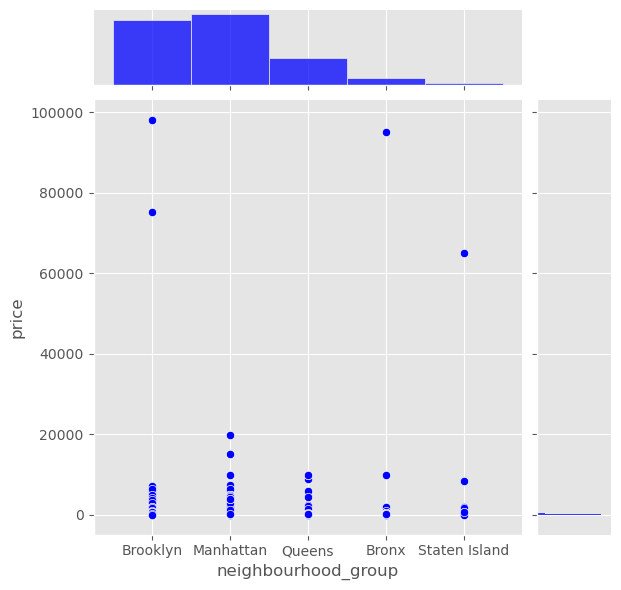

In [6]:
sns.jointplot(x = listingsNYC['neighbourhood_group'],y = listingsNYC['price'], color='blue')

In [7]:
price_no_outlier = listingsNYC.loc[(listingsNYC['price'] - listingsNYC['price'].mean()).abs() / listingsNYC['price'].std() < 1]

In [8]:
# find the percentage of points that we keep
price_no_outlier.shape

(40873, 19)

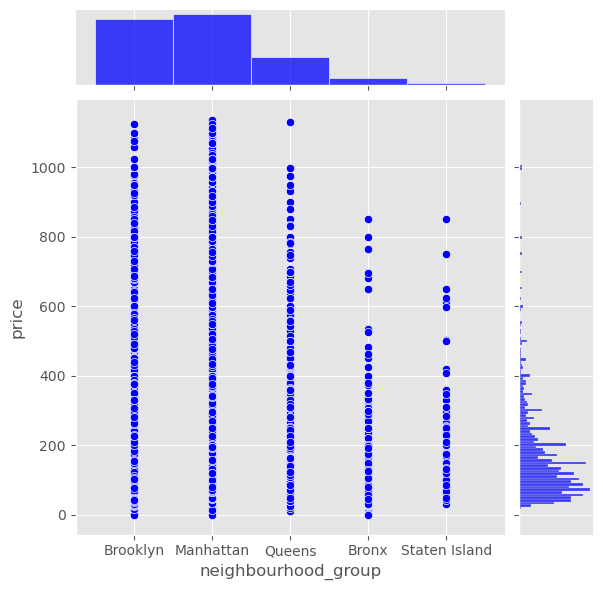

In [9]:
sns.jointplot(x = price_no_outlier['neighbourhood_group'],y = price_no_outlier['price'], color='blue')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

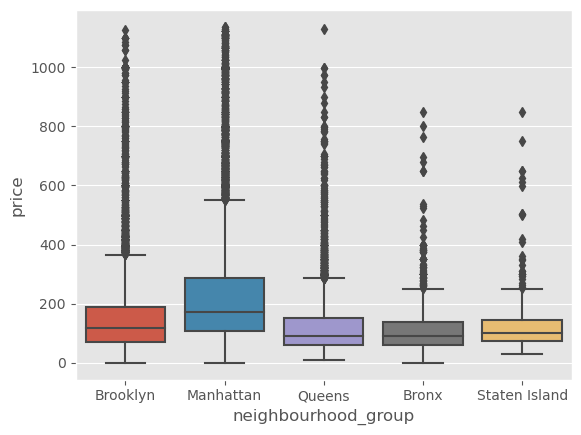

In [9]:
sns.boxplot(x = price_no_outlier['neighbourhood_group'],y = price_no_outlier['price'])

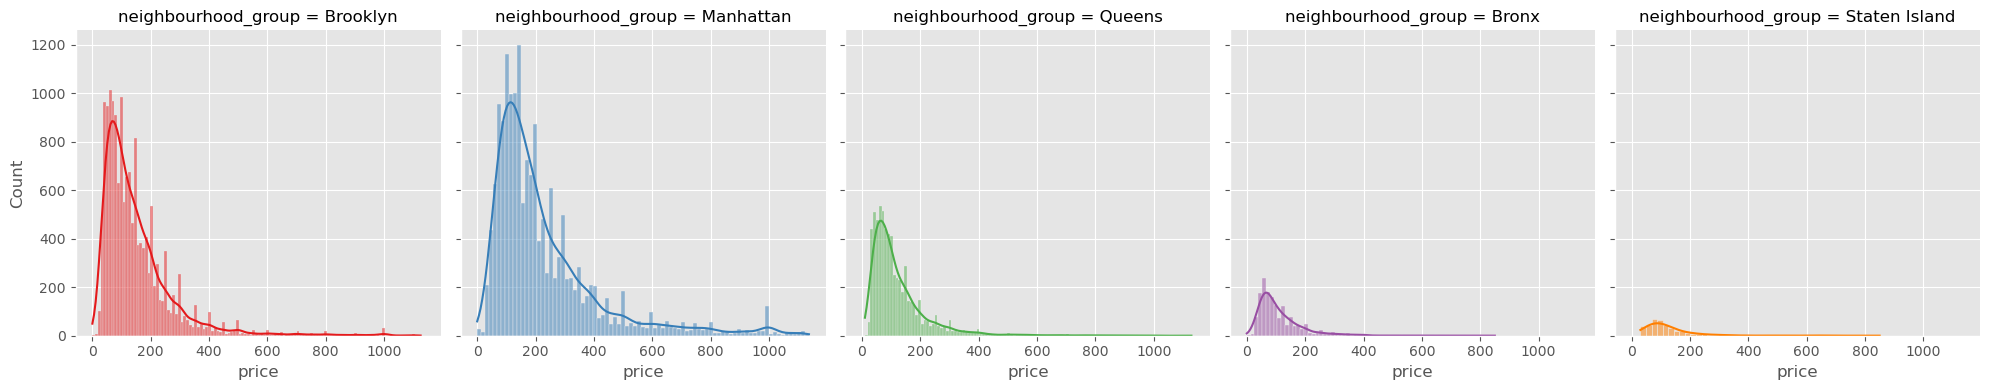

In [10]:
neighbourhood_group_grid = sns.FacetGrid(price_no_outlier, col = 'neighbourhood_group', hue = "neighbourhood_group", palette = "Set1", height = 4)
neighbourhood_group_grid.map(sns.histplot, "price", kde=True)

In [11]:
neighborhood_groups = price_no_outlier.groupby('neighbourhood_group')
grouped_by_neighborhood = neighborhood_groups[['price','pps']].mean()
grouped_by_neighborhood=grouped_by_neighborhood.reset_index()
grouped_by_neighborhood

,neighbourhood_group,price,pps
0,Bronx,112.351232,955.663298
1,Brooklyn,150.917793,2253.536106
2,Manhattan,230.884308,3994.359645
3,Queens,122.771279,1462.354317
4,Staten Island,128.770000,1123.567500


Text(0.5, 1.0, 'Barplot of Average Price of each Borough')

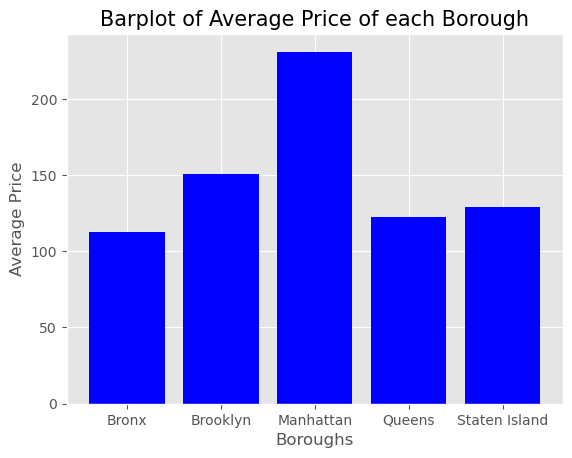

In [12]:
plt.bar(grouped_by_neighborhood['neighbourhood_group'], grouped_by_neighborhood['price'],color='blue')
plt.xlabel('Boroughs')
plt.ylabel('Average Price')
plt.title('Barplot of Average Price of each Borough', fontsize = 15)

In [13]:
neighborhood_groups_outliers = listingsNYC_outlier.groupby('neighbourhood_group')
grouped_by_neighborhood_outliers = neighborhood_groups_outliers[['price','pps']].mean()
grouped_by_neighborhood_outliers=grouped_by_neighborhood_outliers.reset_index()
grouped_by_neighborhood_outliers

,neighbourhood_group,price,pps
0,Bronx,180.816635,1093.275992
1,Brooklyn,171.926441,2546.876849
2,Manhattan,301.211665,4833.076728
3,Queens,135.656389,1767.035128
4,Staten Island,320.343210,1586.059259


Text(0.5, 1.0, 'Barplot of Average Price of each Borough with Outliers')

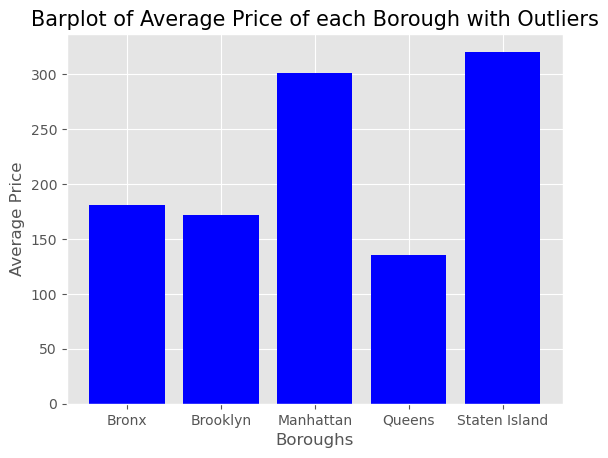

In [15]:
plt.bar(grouped_by_neighborhood_outliers['neighbourhood_group'], grouped_by_neighborhood_outliers['price'], color='blue')
plt.xlabel('Boroughs')
plt.ylabel('Average Price')
plt.title('Barplot of Average Price of each Borough with Outliers', fontsize = 15)
